In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import squarify
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from matplotlib.markers import MarkerStyle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
df = pd.read_csv("Data Science Salaries.csv")

In [41]:
original_df = df.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [43]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [44]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [45]:
df.shape

(607, 12)

In [46]:
df = df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis = 1)

In [47]:
df.shape

(607, 9)

In [48]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [51]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [52]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [53]:
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [54]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [55]:
import country_converter as coco

In [56]:
df['company_location'].head(5)
    

0    DE
1    JP
2    GB
3    HN
4    US
Name: company_location, dtype: object

In [57]:
df['employee_residence'] = coco.convert(names = df['employee_residence'], to = 'name_short')

In [58]:
df['company_location'] = coco.convert(names = df['company_location'], to = 'name_short')

In [59]:
df['company_location'].value_counts()

United States           355
United Kingdom           47
Canada                   30
Germany                  28
India                    24
France                   15
Spain                    14
Greece                   11
Japan                     6
Netherlands               4
Austria                   4
Portugal                  4
Poland                    4
Luxembourg                3
Pakistan                  3
Brazil                    3
United Arab Emirates      3
Mexico                    3
Australia                 3
Türkiye                   3
Denmark                   3
Italy                     2
Czech Republic            2
Slovenia                  2
Russia                    2
Switzerland               2
Nigeria                   2
China                     2
Belgium                   2
Vietnam                   1
Estonia                   1
American Samoa            1
Algeria                   1
Malaysia                  1
Moldova                   1
Kenya               

In [60]:
kept_countries = ('United States', 'United Kingdom', 'Canada', 'Germany', 'India', 'France', 'Spain', 'Greece', 'Japan')

In [61]:
# keeping only desired countries for company location
df = df[df.company_location.isin(kept_countries)]

In [62]:
df['company_location'].value_counts()

United States     355
United Kingdom     47
Canada             30
Germany            28
India              24
France             15
Spain              14
Greece             11
Japan               6
Name: company_location, dtype: int64

In [25]:
df['employee_residence'].value_counts()

United States     332
United Kingdom     44
Canada             29
India              28
Germany            24
France             17
Spain              14
Greece             12
Japan               6
Brazil              3
Pakistan            3
Romania             2
Vietnam             2
Russia              2
Bulgaria            1
Philippines         1
Hungary             1
Portugal            1
Poland              1
Italy               1
Hong Kong           1
Serbia              1
Puerto Rico         1
Netherlands         1
Malaysia            1
Bolivia             1
Name: employee_residence, dtype: int64

In [63]:
# keeping only desired countries for employee residence
df = df[df.employee_residence.isin(kept_countries)]

In [64]:
df['employee_residence'].value_counts()

United States     332
United Kingdom     44
Canada             29
India              28
Germany            24
France             17
Spain              14
Greece             12
Japan               6
Name: employee_residence, dtype: int64

In [65]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,Germany,0,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,Japan,0,Japan,S
2,2020,SE,FT,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M
4,2020,SE,FT,Machine Learning Engineer,150000,United States,50,United States,L
5,2020,EN,FT,Data Analyst,72000,United States,100,United States,L
6,2020,SE,FT,Lead Data Scientist,190000,United States,100,United States,S
8,2020,MI,FT,Business Data Analyst,135000,United States,100,United States,L
10,2020,EN,FT,Data Scientist,51321,France,0,France,S
11,2020,MI,FT,Data Scientist,40481,India,0,India,L
12,2020,EN,FT,Data Scientist,39916,France,0,France,M


In [66]:
df['job_title'].value_counts()

Data Scientist                              121
Data Engineer                               117
Data Analyst                                 94
Machine Learning Engineer                    27
Data Science Manager                         12
Research Scientist                           11
Data Architect                               11
Machine Learning Scientist                    7
Principal Data Scientist                      7
Data Analytics Manager                        7
Data Science Consultant                       7
Director of Data Science                      6
Data Engineering Manager                      5
ML Engineer                                   5
Applied Data Scientist                        5
Business Data Analyst                         4
BI Data Analyst                               4
Big Data Engineer                             4
Analytics Engineer                            4
AI Scientist                                  3
Head of Data Science                    

In [67]:
kept_jobs = ('Data Scientist', 'Data Engineer', 'Data Analyst',  'Machine Learning Engineer', 'Data Science Manager', 'Research Scientist', 'Data Architect', 'Data Science Consultant',  'Director of Data Science')

In [68]:
# keeping only desired jobs
df = df[df.job_title.isin(kept_jobs)]

In [69]:
df['job_title'].value_counts()

Data Scientist               121
Data Engineer                117
Data Analyst                  94
Machine Learning Engineer     27
Data Science Manager          12
Research Scientist            11
Data Architect                11
Data Science Consultant        7
Director of Data Science       6
Name: job_title, dtype: int64

In [70]:
# Format salary with $K
def format_salary(salary):
    """takes a large number and formats it into K"""
    s = '{:1.0f}K'.format(salary*1e-3)
    return s

df['formatted_salary']=df['salary_in_usd'].apply(format_salary)

In [71]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,formatted_salary
0,2020,MI,FT,Data Scientist,79833,Germany,0,Germany,L,80K
4,2020,SE,FT,Machine Learning Engineer,150000,United States,50,United States,L,150K
5,2020,EN,FT,Data Analyst,72000,United States,100,United States,L,72K
10,2020,EN,FT,Data Scientist,51321,France,0,France,S,51K
11,2020,MI,FT,Data Scientist,40481,India,0,India,L,40K


In [72]:
df.shape


(406, 10)

In [73]:
# Investigate outliers
df[df['company_location'] == 'United States'].describe()['salary_in_usd']

count       277.000000
mean     140025.620939
std       55521.648495
min        5679.000000
25%      102100.000000
50%      135000.000000
75%      165400.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

# Map

In [74]:
#Removing Outliers
map_df = df[df['salary_in_usd'] < 200000]

In [75]:
# Group by country for average
df_salary_percountry = map_df[['company_location', 'salary_in_usd']].groupby(['company_location']).mean().reset_index()

In [76]:
df_salary_percountry['salary_in_usd'] = df_salary_percountry['salary_in_usd'].astype(int)

In [79]:
# sum of salaries per countries
# should include all countries before removing them
# check if the map is still interactable when imported
# figure out a way to show values on screen
# save original data frame to show values
# Will remain static for all selections

fig = px.scatter_geo(df_salary_percountry, 
                     locations='company_location', 
                     size='salary_in_usd', 
                     locationmode='country names', 
                     color='company_location', 
                     title='Average Salaries Per Country',
                    projection = 'natural earth')

fig.show()

In [80]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,formatted_salary
0,2020,MI,FT,Data Scientist,79833,Germany,0,Germany,L,80K
4,2020,SE,FT,Machine Learning Engineer,150000,United States,50,United States,L,150K
5,2020,EN,FT,Data Analyst,72000,United States,100,United States,L,72K
10,2020,EN,FT,Data Scientist,51321,France,0,France,S,51K
11,2020,MI,FT,Data Scientist,40481,India,0,India,L,40K


# Heatmap

In [81]:
# filtering dataframe
df_heatmap = df.groupby(['work_year', 'job_title']).mean()['remote_ratio'].reset_index()
df_heatmap.head()

C:\Users\jjavi\AppData\Local\Temp\ipykernel_260\1980408428.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,work_year,job_title,remote_ratio
0,2020,Data Analyst,70.000
1,2020,Data Engineer,81.250
2,2020,Data Science Consultant,75.000
3,2020,Data Science Manager,100.000
4,2020,Data Scientist,59.375


In [82]:
# creating labels for remote ratio into category to later make it numerical
df_heatmap['remote'] = pd.qcut(
    df_heatmap['remote_ratio'],
    5,
    labels = ['Non Remote', 'Some Remote', 'Half Remote', 'Mostly Remote', 'Fully Remote'])
df_heatmap.head()

,work_year,job_title,remote_ratio,remote
0,2020,Data Analyst,70.000,Half Remote
1,2020,Data Engineer,81.250,Mostly Remote
2,2020,Data Science Consultant,75.000,Half Remote
3,2020,Data Science Manager,100.000,Fully Remote
4,2020,Data Scientist,59.375,Non Remote


In [83]:
# Creating codes for categories to use in heat map
df_heatmap['remote_code'] = df_heatmap['remote'].cat.codes
df_heatmap.head()

,work_year,job_title,remote_ratio,remote,remote_code
0,2020,Data Analyst,70.000,Half Remote,2
1,2020,Data Engineer,81.250,Mostly Remote,3
2,2020,Data Science Consultant,75.000,Half Remote,2
3,2020,Data Science Manager,100.000,Fully Remote,4
4,2020,Data Scientist,59.375,Non Remote,0


In [84]:
# pivoting values for better readability
df_heatmap = df_heatmap.pivot(index='work_year', columns='job_title', values='remote_code')
df_heatmap.head()

job_title,Data Analyst,Data Architect,Data Engineer,Data Science Consultant,Data Science Manager,Data Scientist,Director of Data Science,Machine Learning Engineer,Research Scientist
work_year,,,,,,,,,
2020,2.0,NaN,3.0,2.0,4.0,0.0,4.0,1.0,0.0
2021,2.0,4.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0
2022,3.0,4.0,3.0,NaN,4.0,1.0,0.0,0.0,1.0


In [85]:
# replacing NAN values with 0
df_heatmap.iloc[0,1] = 0
df_heatmap.iloc[2,3] = 0

In [86]:
df_heatmap.head()

job_title,Data Analyst,Data Architect,Data Engineer,Data Science Consultant,Data Science Manager,Data Scientist,Director of Data Science,Machine Learning Engineer,Research Scientist
work_year,,,,,,,,,
2020,2.0,0.0,3.0,2.0,4.0,0.0,4.0,1.0,0.0
2021,2.0,4.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0
2022,3.0,4.0,3.0,0.0,4.0,1.0,0.0,0.0,1.0


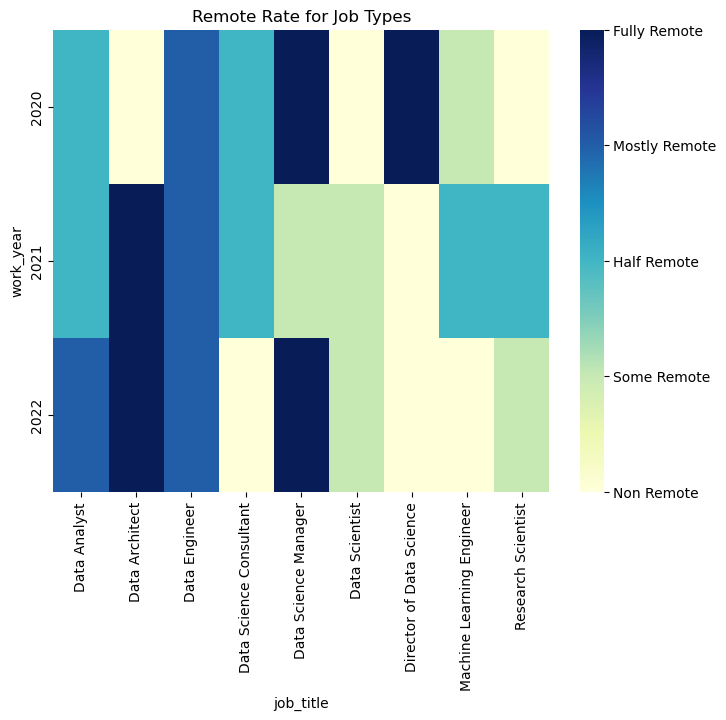

In [87]:
#heatmap syntax
plt.figure(figsize=(8,6));
ax = sns.heatmap(df_heatmap, cmap = 'YlGnBu')
ax.set_title('Remote Rate for Job Types')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3, 4]) # choosing categories for remote type
colorbar.set_ticklabels(['Non Remote', 'Some Remote', 'Half Remote', 'Mostly Remote', 'Fully Remote'])



# Combined Graph

In [88]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,formatted_salary
0,2020,MI,FT,Data Scientist,79833,Germany,0,Germany,L,80K
4,2020,SE,FT,Machine Learning Engineer,150000,United States,50,United States,L,150K
5,2020,EN,FT,Data Analyst,72000,United States,100,United States,L,72K
10,2020,EN,FT,Data Scientist,51321,France,0,France,S,51K
11,2020,MI,FT,Data Scientist,40481,India,0,India,L,40K


In [89]:
df_dual = df[['job_title', 'experience_level', 'salary_in_usd']].groupby(['job_title', 'experience_level']).mean().reset_index()

In [90]:
df['job_title'].value_counts()

Data Scientist               121
Data Engineer                117
Data Analyst                  94
Machine Learning Engineer     27
Data Science Manager          12
Research Scientist            11
Data Architect                11
Data Science Consultant        7
Director of Data Science       6
Name: job_title, dtype: int64

In [91]:
# filtering data by job title
jobs = ('Data Analyst', 'Data Scientist', 'Data Architect', 'Data Engineer', 'Machine Learning Engineer', 'Data Science Consultant' )

In [92]:
df_dual = df_dual[df_dual['job_title'].isin(jobs)]

In [93]:
df_dual.head()

,job_title,experience_level,salary_in_usd
0,Data Analyst,EN,57957.090909
1,Data Analyst,EX,120000.000000
2,Data Analyst,MI,73974.178571
3,Data Analyst,SE,112524.943396
4,Data Architect,MI,166666.666667


In [94]:
# Removing Expert Category
df_dual = df_dual[df_dual['experience_level'] != 'EX']

In [95]:
# converting mean values to integer
df_dual['salary_in_usd'] = df_dual['salary_in_usd'].astype(int)

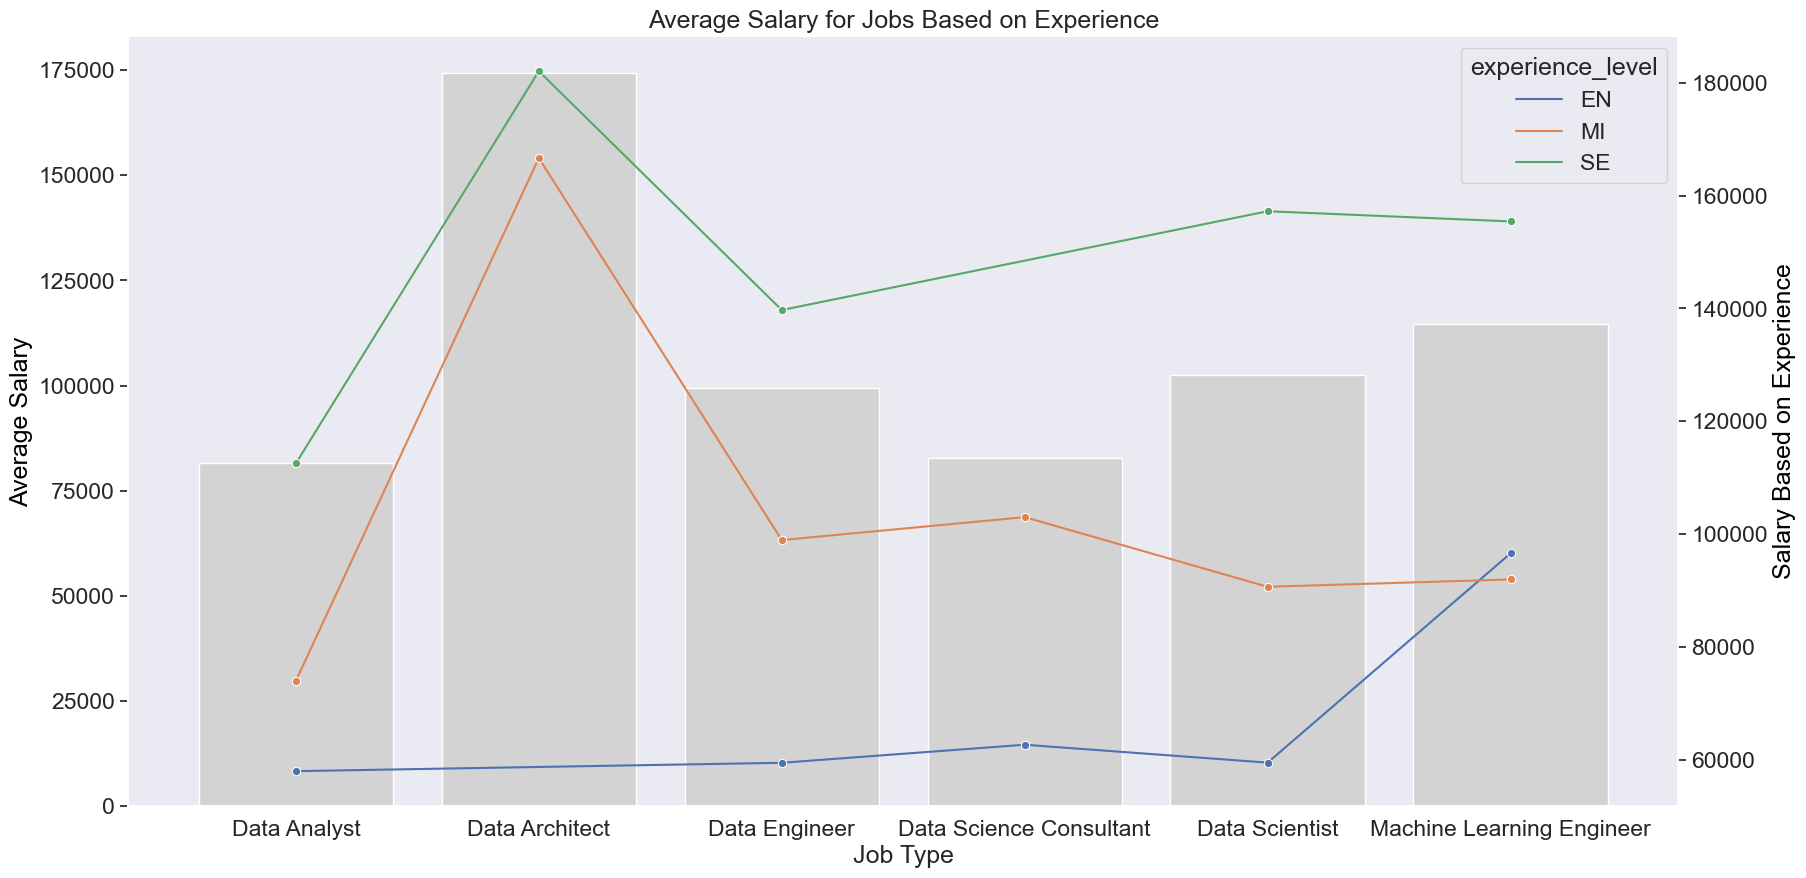

In [97]:

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() # copy for the axis 
ax1.grid(False) # removing second grid line
ax2.grid(False)
# Two separate graphs that have the same axis
sns.barplot(data = df_dual, x = 'job_title', y = 'salary_in_usd', color = 'lightgrey', ax = ax1, errorbar = None) # plots the first set of data, and sets it to ax1. 
sns.lineplot(data = df_dual, x = 'job_title', y = 'salary_in_usd', marker = 'o', hue = 'experience_level', ax = ax2) # plots the second set, and sets to ax2. 
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale =1.5)
ax1.set_xlabel('Job Type')
ax1.set_ylabel('Average Salary', color='black')
ax2.set_ylabel('Salary Based on Experience', color='black')
plt.title('Average Salary for Jobs Based on Experience')
plt.show(); # shows the plot.

# Categorical Scatter Plot

In [98]:
# Filtering values into a new data frame
df_scatter = df[['job_title', 'company_size', 'salary_in_usd']]

In [99]:
jobs = ('Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer')

In [100]:
# removing outlier
df_scatter = df_scatter[df_scatter['salary_in_usd'] < 300000]

In [101]:
# filtering for jobs
df_scatter = df_scatter[df_scatter['job_title'].isin(jobs)]

In [102]:
# converting average to integer
df_scatter['salary_in_usd'] = df_scatter['salary_in_usd'].astype(int)

C:\Users\jjavi\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Red'` for same effect.



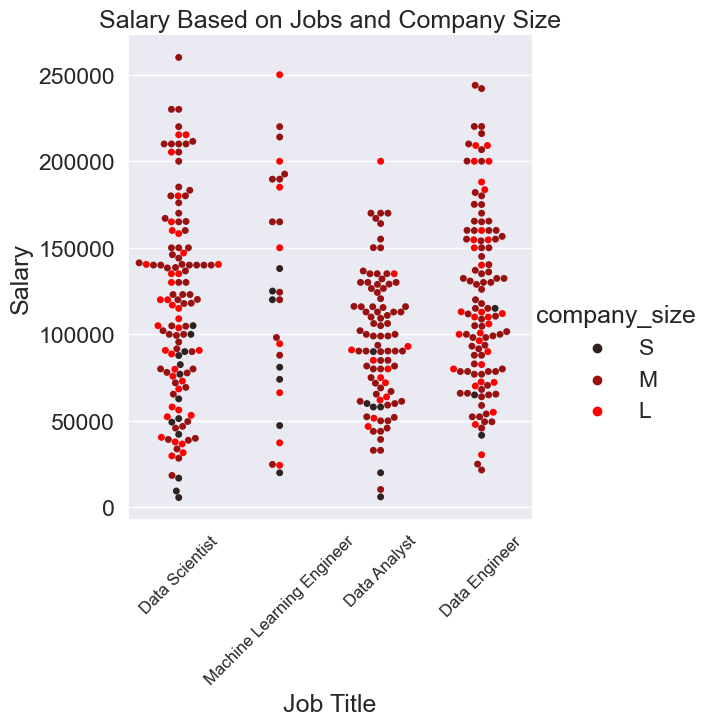

In [103]:
#  a scatter plot with the swarm plot style
sns.catplot(data=df_scatter, kind="swarm", x="job_title", color = 'Red', hue_order = ['S', 'M', 'L'], y="salary_in_usd", hue="company_size", height = 6)
sns.set_style('dark')
plt.title('Salary Based on Jobs and Company Size')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation = 45, fontsize = 12)
plt.show()

# Box Plot

In [105]:
# filtering box dataframe
df_box = df[['job_title', 'work_year', 'salary_in_usd']]

In [106]:
jobs = ('Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer')

In [107]:
df_box = df_box[df_box['job_title'].isin(jobs)]

In [108]:
# removing outlier
df_box = df_box[df_box['salary_in_usd'] < 300000]

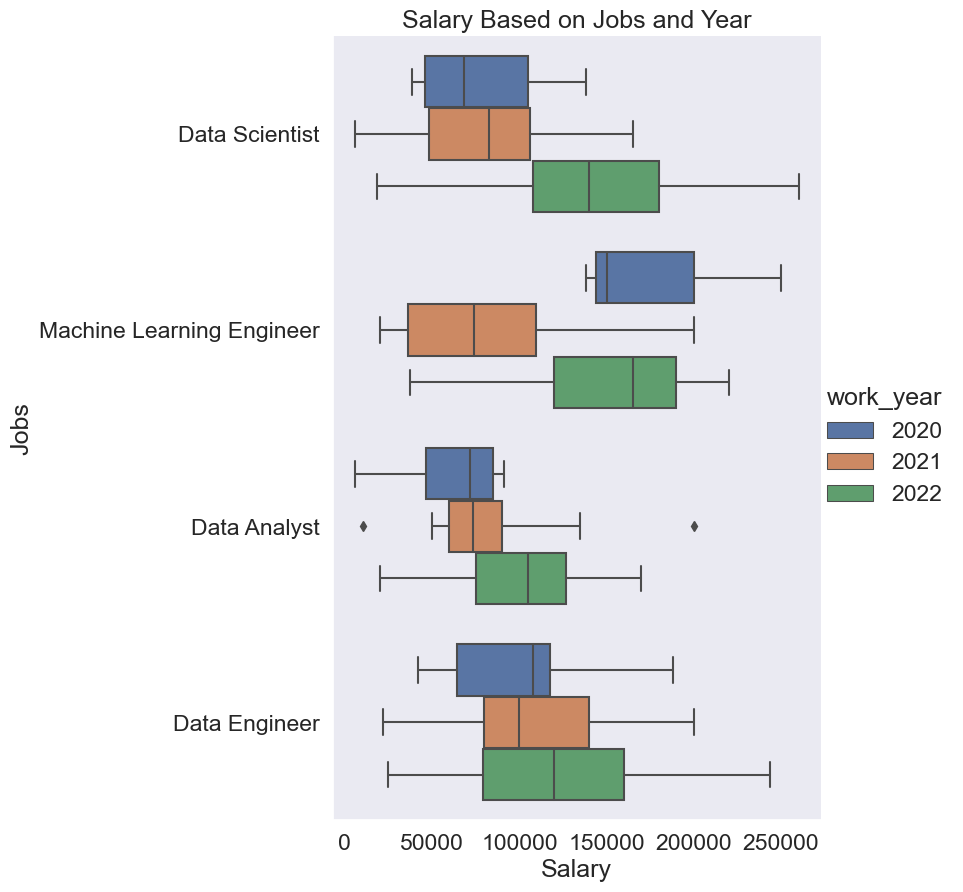

In [109]:
# box plot syntax 
sns.catplot(data=df_box, x="salary_in_usd", y="job_title", hue="work_year", kind="box", height=9, hue_order = [2020, 2021, 2022])
plt.title('Salary Based on Jobs and Year')
plt.xlabel('Salary')
plt.ylabel('Jobs')
plt.show()

# Linear Regression

In [110]:
#Filtering Jobs
jobs = ('Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer')

In [111]:
filtered_df = df[df['job_title'].isin(jobs)]

In [112]:
filtered_df['job_title'].value_counts()

Data Scientist               121
Data Engineer                117
Data Analyst                  94
Machine Learning Engineer     27
Name: job_title, dtype: int64

# Checking for data length

In [113]:
# Missing data for categories, must add more data
filtered_df[['job_title', 'experience_level', 'company_size']].value_counts()

job_title                  experience_level  company_size
Data Analyst               SE                M               51
Data Engineer              SE                M               48
Data Scientist             SE                M               42
Data Engineer              MI                M               28
Data Scientist             MI                M               23
                                             L               18
Data Analyst               MI                M               17
Data Scientist             SE                L               15
Data Engineer              MI                L               14
                           SE                L               12
Machine Learning Engineer  SE                M                8
Data Analyst               MI                L                8
                           EN                M                6
Data Scientist             EN                M                6
                                             S

In [114]:
# filtering out expert category
filtered_df = filtered_df[filtered_df['experience_level'] != 'EX']

In [115]:
# filtering for only the US
filtered_df = filtered_df[filtered_df['company_location'] == 'United States']

In [116]:
#only keeping desired columns for statistical models
filtered_df = filtered_df[['job_title', 'experience_level', 'company_size', 'salary_in_usd']]

In [117]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 4 to 605
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         244 non-null    object
 1   experience_level  244 non-null    object
 2   company_size      244 non-null    object
 3   salary_in_usd     244 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


In [118]:
filtered_df.head(10)

,job_title,experience_level,company_size,salary_in_usd
4,Machine Learning Engineer,SE,L,150000
5,Data Analyst,EN,L,72000
14,Data Analyst,MI,L,85000
32,Data Scientist,SE,L,68428
37,Machine Learning Engineer,EN,L,250000
39,Machine Learning Engineer,EN,S,138000
43,Data Engineer,MI,L,106000
47,Data Engineer,SE,L,188000
48,Data Scientist,MI,L,105000
51,Data Analyst,EN,L,91000


# Merge New Data

In [119]:
df_addon = pd.read_csv("Data Science Salaries Add On.csv")

In [120]:
# New CSV data frame
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         1336 non-null   object
 1   experience_level  1336 non-null   object
 2   company_size      1336 non-null   object
 3   salary_in_usd     1336 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 41.9+ KB


In [121]:
#  Merged Kaggle df with add on df using concat to append values
merged_df = pd.concat([df_addon, filtered_df], axis=0)

In [122]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 0 to 605
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         1580 non-null   object
 1   experience_level  1580 non-null   object
 2   company_size      1580 non-null   object
 3   salary_in_usd     1580 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 61.7+ KB


In [123]:
merged_df.shape

(1580, 4)

In [124]:
merged_df.groupby('experience_level').mean().astype(int)

C:\Users\jjavi\AppData\Local\Temp\ipykernel_260\3761220018.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,salary_in_usd
experience_level,
EN,72510
MI,108723
SE,149479


In [125]:
merged_df.head(10)

,job_title,experience_level,company_size,salary_in_usd
0,Data Scientist,SE,L,203610
1,Data Scientist,SE,L,218000
2,Data Scientist,SE,L,247000
3,Data Scientist,SE,L,240500
4,Data Scientist,SE,L,220000
5,Data Scientist,SE,L,187500
6,Data Scientist,SE,L,254000
7,Data Scientist,SE,S,152838
8,Data Scientist,SE,S,93300
9,Data Scientist,SE,S,112800


# Choose Job Tab

In [126]:
job_chosen = 'Data_Scientist'

# Converting to Dummy Variables

In [127]:
# converting jobs using one hot encoding
df_dummies=pd.get_dummies(merged_df,columns=['job_title'], drop_first = False)

In [128]:
# converting salaries to the thousands
df_dummies['salary_in_usd'] = df_dummies['salary_in_usd'] / 1000

In [129]:
df_dummies.head()

,experience_level,company_size,salary_in_usd,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer
0,SE,L,203.61,0,0,1,0
1,SE,L,218.00,0,0,1,0
2,SE,L,247.00,0,0,1,0
3,SE,L,240.50,0,0,1,0
4,SE,L,220.00,0,0,1,0


In [130]:
# renaming job title columns
df_dummies.rename (columns ={'job_title_Data Analyst':'Data_Analyst','job_title_Data Engineer':'Data_Engineer', 'job_title_Data Scientist': 'Data_Scientist', 'job_title_Machine Learning Engineer': 'Machine_Learning_Engineer'},inplace=True)

In [131]:
# Selecting dummy column to drop
#if column selected is equal to column dropped, drop other column else keep the dropped column
column_dropped = 'Data_Engineer'
alternative = 'Machine_Learning_Engineer'
if job_chosen != column_dropped:
    df_dummies.drop(column_dropped, axis = 1, inplace = True)
else:
    df_dummies.drop(alternative, axis = 1, inplace = True)

In [132]:
# encoding categorical variables and replacing them with integer
conversion = {'company_size': {'L': 3, 'M': 2, 'S':1}}
df_dummies =  df_dummies.replace(conversion)

In [133]:
conversion = {'experience_level': {'SE': 3, 'MI': 2, 'EN':1}}
df_dummies =  df_dummies.replace(conversion)

In [134]:
df_dummies.head()

,experience_level,company_size,salary_in_usd,Data_Analyst,Data_Scientist,Machine_Learning_Engineer
0,3,3,203.61,0,1,0
1,3,3,218.00,0,1,0
2,3,3,247.00,0,1,0
3,3,3,240.50,0,1,0
4,3,3,220.00,0,1,0


# Multilinear Regression

In [ ]:
# Isolate columns for analysis
colnames = df_dummies.columns.values
colnames = list(colnames[3:6])
colnames

In [ ]:
# loop through list and add to string
columns = 'salary_in_usd~experience_level+company_size'
for col in colnames:
    if col == job_chosen:
        columns+='+' + col
columns

In [ ]:
# Getting the multiple regression object
regression_object_multiple= smf.ols(columns, data=df_dummies)

In [ ]:
regression_linear_model= regression_object_multiple.fit()

In [ ]:
print(str(regression_linear_model.summary()))

In [ ]:
regression_linear_model.predict({'experience_level': 1, 'company_size': 1, 'Data_Analyst': 1, 'Data_Scientist': 0, 'Machine_Learning_Engineer': 0})

In [ ]:
# Fitting the values into the model
regression_linear_model= regression_object_multiple.fit()

In [ ]:
print(str(regression_linear_model.summary()))

In [ ]:
# Prediction Example
regression_linear_model.predict({'experience_level': 1, 'company_size': 1, 'Data_Scientist': 1})

# Equation

Will change depending on chosen job value

In [ ]:
# Retrieving adj r2
# percent of variability reduced in the values of y as opposed to using the mean to make predictions
# over 60% of errors is reduced so the linear regression is the better option
adj_r2 = round(regression_linear_model.rsquared_adj,2)
adj_r2

In [ ]:
# Retrieving coefficients to output full equation on stremlit
#manipulate data frame
params = regression_linear_model.params
params

In [ ]:
# Getting the Index of chosen Job in the series
index = 0
for i in range(len(params)):
    if job_chosen  == params.index[i]:
        index = i
print(params[index])
        

In [ ]:
# concatenates coef with the chosen job coef
current_equation = 'Estimated Salary = {:.2f} + {:.2f} * The Experience Level + {:.2f} * The Company Size + {:.2f} * ({}=1)'.format(params[0], params[1], params[2], params[3], job_chosen)
current_equation

# Residual Plot

checking for linearity and variance values are much spread out to the right so linear regression might not be the best line 
for this dataset



In [ ]:
# residuals vs fitted plot
predicted_values = regression_linear_model.predict()
residual_values = df_dummies['salary_in_usd'] - predicted_values

In [ ]:
# creating dataframe to use with seaborn 
residual_plot = pd.DataFrame({'predicted':predicted_values, 'residuals':residual_values})

In [ ]:
#sampling data then plotting
df_sample = residual_plot.sample(300)
plt.scatter(df_sample['predicted'], df_sample['residuals'],c='blue',marker='o')
plt.xlabel("Predicted Values") 
plt.ylabel("Residuals")
plt.axhline(0,c='red',ls='--')
plt.show()

In [ ]:
# computing the Residual Standard Error of the equation
predicted_values 
actual_values = df_dummies['salary_in_usd']
sse= np.sum((actual_values-predicted_values)**2)
rse = np.sqrt (sse/ (len(df_dummies['salary_in_usd'])-1-1))
rse = int(rse)
rse

In [ ]:
# coefficient of variation is 23% which is the standard deviation to the mean. The greater the coef variation the greater 
# the greater the level of dispersion around the mean. For this kind of problem having the level of dispersion between 
# 5-10% would produce better results with the equation
coe_variation = rse/np.mean(actual_values) * 100
coe_variation

# Root Mean Error Rate

In [ ]:
np.round ( r2_score(actual_values, predicted_values), 2)

In [ ]:
# How close the regression line is to the real values of Y rmse
rmse_reg = math.sqrt(mean_squared_error(actual_values, predicted_values))
rmse_reg

Difference between RSE and MSE

RSE average deviation between the actual outcome and the true regression line(The Mean).

MSE how close the regression line is to the actual values of Y using eucleadian distance.


# Gathering dummy variables for regression trees

In [135]:
df_dummies_trees=pd.get_dummies(merged_df,columns=['job_title'], drop_first = False)

In [ ]:
df_dummies_trees=df_dummies.copy()

In [ ]:
job_chosen = 'Data_Scientist'

In [ ]:
# Dividing salary by 1000
df_dummies_trees['salary_in_usd'] = df_dummies_trees['salary_in_usd'] 

In [ ]:
df_dummies_trees.head()

In [ ]:
for i in df.columns:
    print(i)


In [136]:
# Dividing test and training data
X_train, X_test, y_train, y_test= train_test_split (df_dummies[['experience_level', 'company_size', job_chosen]],df_dummies['salary_in_usd'], test_size=0.2, random_state=1)

# Decision Tree

Printing a long tree and getting best parameters

In [ ]:
# Grid to use cross validation to search for best parameters
hyperparam_grid = {
    'max_depth': np.arange(2,11), # testing depth from 2 to 10
    'min_samples_split':[0.1, 0.15, 0.2],
    'min_samples_leaf':[0.05, 0.1, 0.15], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01, 0.05]
}


In [ ]:
#Getting cv object
gridSearch = GridSearchCV(DecisionTreeRegressor(), hyperparam_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
gridSearch.fit(X_train, y_train)

In [ ]:
# best parameters with lowest MSE
print('Initial parameters are: ', gridSearch.best_params_)

In [ ]:
type(gridSearch.best_params_['max_depth'])

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth= 8, min_samples_split= 0.1, min_samples_leaf= 0.05, min_impurity_decrease= 0.01, random_state=1)

In [ ]:
# Fitting final tree
decision_tree.fit(X_train, y_train)

In [ ]:
# Plotting Tree
plt.figure(figsize=(25,20))   
tree.plot_tree(decision_tree,filled=True, rounded= True, feature_names=X_train.columns, fontsize=12)
plt.show()

In [ ]:
# predicted values
experience = 0
company = 1
job_chosen
data_to_predict = pd.DataFrame({'experience_level': [experience], 'company_size': [company], job_chosen: [1]})

In [ ]:
# prediction example
value_decision_tree = decision_tree.predict(data_to_predict) * 1000
value_decision_tree = int(value_decision_tree)
value_decision_tree

# Tree Details

In [ ]:
# Getting MSE from Tree and displaying rmse
tree_mse = mean_squared_error( y_test, decision_tree.predict (X_test))
rmse_tree = math.sqrt(tree_mse)
rmse_tree

In [ ]:
# getting Final Parameters
tree_final_params = decision_tree.get_params()

* Max Depth: Mximum depth of the tree, how big we want the tree to grow
* min impurity decrease: minimun decrease in error we are willing to accept
* min sample split: Minimum number of samples to split a node
* Minimum sample leaf: minimum number of samples to be a leaf node


In [ ]:
# Making a series of the values
series_decision_tree = pd.Series(tree_final_params)
series_decision_tree

# Bagging Non Random Forest

* Creates several subsets of data chosen randomly with replacement to then train each decision tree. Then it will combine several decision trees to produce better preidction models as opposed to choosing a single very large decision tree which 
might suffer from high bias. 

In [137]:
# number of trees used
number_of_trees=np.arange(50,501,10)

In [139]:
# will return the best collection of trees with the lowest mse
mse_bagging_oob_scores=[]
for i in number_of_trees:
    bag_loop= RandomForestRegressor(n_estimators = i, oob_score= True, max_features=None, random_state=1)
    bag_loop.fit(X_train, y_train)
    mse_bagging_oob_scores.append(mean_squared_error(y_train, bag_loop.oob_prediction_))

In [140]:
# index with lowest oob mse
indexmin_bagging= mse_bagging_oob_scores.index(min(mse_bagging_oob_scores))

In [141]:
# numbers of trees that resulted in lowest mse
trees = number_of_trees[indexmin_bagging]

In [142]:
# Building model with selected trees
bagging_forest= RandomForestRegressor(n_estimators= trees, max_features=None, random_state=1)

In [144]:
fit_bag_trees = bagging_forest.fit(X_train, y_train)

In [146]:
params = fit_bag_trees.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 460,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Tree Details

In [ ]:
# mse
mse_bagging = mean_squared_error( y_test, bagging_forest.predict (X_test))
mse_bagging

In [ ]:
# rmse
rmse_bagging = math.sqrt(mse_bagging)
rmse_bagging

In [ ]:
# Number of trees used 
trees

In [ ]:
# General Info
fit_bag_trees

In [ ]:
# predicted values
experience = 0
company = 1
job_chosen
data_to_predict = pd.DataFrame({'experience_level': [experience], 'company_size': [company], job_chosen: [1]})

In [ ]:
# prediction example
value_bg_tree = bagging_forest.predict(data_to_predict) * 1000
value_bg_tree = int(value_bg_tree)
value_bg_tree

# Random Forest

In [373]:
# Getting number of features range
number_of_features=np.arange(1,4)

In [374]:
# Setting up cv grid
param_grid_rf = {  'n_estimators': np.arange(50,501,20), 
     'max_features': number_of_features                        
}

In [375]:
gridSearch_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5,scoring='neg_mean_squared_error')

In [ ]:
gridSearch_rf.fit(X_train, y_train)

In [ ]:
# Features used
features = gridSearch_rf.best_params_['max_features']

In [ ]:
trees_used = gridSearch_rf.best_params_['n_estimators']

In [ ]:
# constructing tree using best parameters
rf_model = RandomForestRegressor(n_estimators= trees_used , max_features=features, random_state=1)

In [ ]:
rf_output = rf_model.fit(X_train, y_train)

# Tree Details

In [ ]:
# mse
mse_rf = mean_squared_error( y_test, rf_model.predict (X_test))
mse_rf

In [ ]:
# rmse Lowest rmse
rmse_rf = math.sqrt(mse_rf)
rmse_rf

In [ ]:
# General Info
rf_output

In [ ]:
# predicted values
experience = 0
company = 1
job_chosen
data_to_predict = pd.DataFrame({'experience_level': [experience], 'company_size': [company], job_chosen: [1]})

In [ ]:
# prediction example
value_rf_tree = rf_model.predict(data_to_predict) * 1000
value_rf_tree = int(value_rf_tree)
value_rf_tree